<a href="https://colab.research.google.com/github/kcarty2/PYH225_Homework/blob/master/Final_Project_DOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Department of Buildings Work Permit for Change of Occupancy**


---






In [0]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os


## **Import Data**

In [39]:
path = "output.csv"
df = pd.read_csv("output.csv")
#import dataset from google drive

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,20,29,31,32,38,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Problem Statement:**
The purpose of this analysis is to identify work permits submitted  for single to two family conversions in Bronx, New York. Additionally, the architect who submitted application must be identified.  

# **Understanding The Data:**

Quantity of applications in the data
x = prod['id'].nunique()
print("Total number of applications in the data: ", x)
Total number of applications in the data:  7197

### **Hypothesis**: That I will be able to isolate that Architects who succesfully submitted an application and received work permits for single to two family home conversions. 

**Data Dictionary:** 

Job # - Number assigned by DOB to Job Filing

Doc # - Document Number

Borough	- 1= Manhattan, 2= Bronx, 3 = Brooklyn, 4 = Queens, 5 = Staten Island

House #	- House Number of Residence or Commercial Property

Street Name	- Street Name where Property is located

Block	- Tax block assigned by Department of Finance

Lot	- Tax lot assigned by Department of Finance

Bin #	- Number assigned by City Planning to a specific building

Job Type - Job Type, based on DOB Job Code (NB-New Building, A1, A2, 
A3- Alterations 1-3, SG-Sign, etc.)

Job Status - 	DOB Status code of job (A-Pre Filed, I-Sign Off, P- Approved, R-Permit Entire) Complete List - http://www.nyc.gov/html/dob/downloads/pdf/bisjobstatus.pdf

Job Status Descrp	- Status code description

Latest Action Date - Latest status date

Date & Time - Date & Time

Building Type	- 1-2-3 Family or Other

Community - Board	- 3-digit identifier: Borough code = first position, last 2 = community board

Cluster	- Cluster

Landmarked	- L code indicates that the building has been assigned landmark status

Adult Estab	- Adult Estab

Loft Board	- Loft Board

City Owned	- City Owned

Little e	- Hazardous

PC Filed	- Application Filed electronically, rather than manually

eFiling Filed	- Application Filed electronically, rather than manually

Plumbing - Plumbing Work Type? (X=Yes, Blank=No)

Mechanical	- Mechanical Work Type? (X=Yes, Blank=No)

Boiler	- Boiler Work Type? (X=Yes, Blank=No)

Fuel Burning	- Fuel Burning Work Type? (X=Yes, Blank=No)

Fuel Storage	- Fuel Storage Work Type? (X=Yes, Blank=No)

Standpipe	- Standpipe Work Type? (X=Yes, Blank=No)

Sprinkler	- Sprinkler Work Type? (X=Yes, Blank=No)

Fire Alarm	- Fire Alarm Work Type? (X=Yes, Blank=No)

Equipment	- Equipment Work Type? (X=Yes, Blank=No)

Fire Suppression	- Fire Suppression Work Type? (X=Yes, Blank=No)

Curb Cut	- Curb Cut Work Type? (X=Yes, Blank=No)

Other	- Other? (X=Yes, Blank=No)

Other Description	- Other Description

Applicant's First Name	- First Name of Applicant

Applicant's Last Name	- Last Name of Applicant

Applicant Professional Title	- Applicant's Professional Title

Applicant License #	- Number assigned to the skilled trade person/contractor or licensed professional

Professional Cert	- Job is Professionally Certified by Licensed Professional instead of having it reviewed by Department of Building's Plan Examiners

Pre- Filing Date	- Date when job is prefiled

Paid	- Date when job is paid

Fully Paid	- Date when job is paid and entered

Assigned	- Date when job is assigned to plan examiner

Approved	- Date when job is approved

Fully Permitted	- Date when job is fully permitted

Initial Cost	- Estimated cost of job

Total Est. Fee	- Estimated fee of job

Fee Status	- Type of Fee
Existing Zoning Sqft	- Existing Zoning Sqft Number

Proposed Zoning Sqft	- Proposed Zoning Sqft Number

Horizontal Enlrgmt	- Horizontal Enlrgmt

Vertical Enlrgmt	- Vertical Enlrgmt

Enlargement SQ Footage	- Enlargement SQ Footage Number

Street Frontage	- Street Frontage Number

ExistingNo. of Stories	- ExistingNo. of Stories Number

Proposed No. of Stories	- Proposed No. of Stories Number

Existing Height	- Existing Height Number

Proposed Height	- Proposed Height Number

Existing Dwelling Units	- Existing Dwelling Units

Proposed Dwelling Units	- Proposed Dwelling Units

Existing Occupancy	- Existing Occupancy

Proposed Occupancy	- Proposed Occupancy

Site Fill	- Site Fill

Zoning Dist1	- Zoning Distr 1

Zoning Dist2	- Zoning Distr 2

Zoning Dist3	- Zoning Distr 3

Special District 1	- Special Distr 1

Special District 2	- Special District 2

Owner Type	- Owner Type

Non-Profit	- Non-Profit

Owner's First Name	- First Name of property owner

Owner's Last Name	- Last Name of property owner

Owner's Business Name	- Business Name of Property Owner

Owner's House Number	- House Number of Property Owner

Owner'sHouse Street Name	- House Street Name of Property Owner

City	- City

State	- State

Zip - Zip

Owner'sPhone #	- Owner's Phone #

Job Description	- Job Description

DOBRunDate	- Date when query is run and pushed to Open Data. Could be used to differentiate report dates.

Date & Time

JOB_S1_NO	- JOB_S1_NO 

TOTAL_CONSTRUCTION_FLOOR_AREA	- Total Construction Floor Area

WITHDRAWAL_FLAG	- Withdrawal Indicator

SIGNOFF_DATE	- Sign-off Date

SPECIAL_ACTION_STATUS	- Special Action Status

SPECIAL_ACTION_DATE	- Special Action Date

BUILDING_CLASS	- Building Class

JOB_NO_GOOD_COUNT	- Job No Good Count

GIS_LATITUDE	- Latitude

GIS_LONGITUDE	- Longitude

GIS_COUNCIL_DISTRICT	- Council District

GIS_CENSUS_TRACT	- Census Tract

GIS_NTA_NAME	- NTA Name

GIS_BIN	- BIN

In [40]:
df

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Cluster,Landmarked,Adult Estab,Loft Board,City Owned,Little e,PC Filed,eFiling Filed,Plumbing,Mechanical,Boiler,Fuel Burning,Fuel Storage,Standpipe,Sprinkler,Fire Alarm,Equipment,Fire Suppression,Curb Cut,Other,Other Description,Applicants First Name,Applicants Last Name,Applicant Professional Title,Applicant License #,Professional Cert,...,Proposed No. of Stories,Existing Height,Proposed Height,Existing Dwelling Units,Proposed Dwelling Units,Existing Occupancy,Proposed Occupancy,Site Fill,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Owner Type,Non-Profit,Owners First Name,Owners Last Name,Owners Business Name,Owners House Number,OwnersHouse Street Name,City,State,Zip,OwnersPhone #,Job Description,DOBRunDate,JOB_S1_NO,TOTAL_CONSTRUCTION_FLOOR_AREA,WITHDRAWAL_FLAG,SIGNOFF_DATE,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,310085421,1,BROOKLYN,576,ST MARKS AVENUE,1224,20.0,3030873,A2,X,SIGNED OFF,02/25/2019 12:00:00 AM,1-2-3 FAMILY,308.0,NaN,N,N,NaN,NaN,NaN,Y,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,ENL,William,Ross,RA,29682,Y,...,2,0,22,NaN,2.0,RES,NaN,NONE,R6,NaN,NaN,NaN,NaN,INDIVIDUAL,N,Ian,Hall,-,576,576 St. Marks Avenue,Brooklyn,NY,11216,7.18624e+09,The purpose of this work is to extend a portio...,02/26/2019 12:00:00 AM,1050337,0,0,02/25/2019,N,NaN,B3,0,40.675716,-73.955051,35.0,221.0,Crown Heights North,3030873.0
1,122698090,1,MANHATTAN,555,BROADWAY,498,11.0,1007576,A2,X,SIGNED OFF,06/25/2019 12:00:00 AM,OTHERS,102.0,N,Y,N,N,NaN,N,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,GEN. CONSTR.,DAVID,BURNS,RA,36004,Y,...,12,130,130,NaN,NaN,E,E,NOT APPLICABLE,M1-5B,NaN,NaN,NaN,NaN,CORPORATION,N,JONATHAN,FELDBERG,"SCHOLASTIC 557 BROADWAY, LLC",557,557 BROADWAY,NEW YORK,NY,10012,2.12344e+09,"REMOVE INTERIOR NON-BEARING PARTITIOTNS, FINIF...",06/26/2019 12:00:00 AM,2594614,0,0,06/25/2019,N,NaN,O6,0,40.723791,-73.998174,1.0,49.0,SoHo-TriBeCa-Civic Center-Little Italy,1007576.0
2,122750941,2,MANHATTAN,601,LEXINGTON AVENUE,1308,7501.0,1036474,A2,X,SIGNED OFF,06/25/2019 12:00:00 AM,OTHERS,106.0,N,N,NaN,N,NaN,NaN,NaN,Y,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHRISTOPHER,JONES,PE,78127,Y,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,ROBERT,SCHUBERT,"BOSTON PROPERTIES, INC.",599,599 LEXINGTON AVENUE,NEW YORK,NY,10022,2.12326e+09,MODIFICATION TO EXISTING HVAC SYSTEM AND PLUMB...,06/26/2019 12:00:00 AM,2597275,0,0,06/25/2019,N,NaN,R0,0,40.758465,-73.970914,4.0,100.0,Turtle Bay-East Midtown,1036474.0
3,302162424,1,BROOKLYN,505,HICKS STREET,321,9.0,3003687,A1,R,PERMIT ISSUED - ENTIRE JOB/WORK,03/27/2019 12:00:00 AM,1-2-3 FAMILY,306.0,NaN,Y,N,NaN,NaN,NaN,Y,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,GC,MICHAEL,SBEGLIA,RA,22223,NaN,...,3,0,43,NaN,3.0,RES,J-0,NONE,R6,NaN,NaN,LH1,NaN,INDIVIDUAL,N,JOSEPH,"OWENS, JR.",NaN,171,171 HICKS STREET,BROOKLYN,NY,11201,7.18255e+09,Filing herewith construction and plumbing alte...,03/29/2019 12:00:00 AM,1011666,4409,0,NaN,N,NaN,C0,0,40.685883,-74.000328,39.0,49.0,Carroll Gardens-Columbia Street-Red Hook,3003687.0
4,421233025,2,QUEENS,105-20,ROCKAWAY BEACH BLVD.,16178,80.0,4303820,A2,X,SIGNED OFF,06/25/2019 12:00:00 AM,OTHERS,414.0,N,N,NaN,N,NaN,Y,NaN,Y,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ROBERT,HATCH,PE,56608,N,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CORPORATION,N,BILL,COLGAN,ROCK BEACH REALTY GROUP LLC,105-38,105-38 ROCKAWAY BOULVEARD,OZONE PARK,NY,11417,9.7343e+09,INSTALLATION OF HVAC SYSTEMS & PLUMBING FIXTU...,06/26/2019 12:00:00 AM,2610843,0,0,06/25/2019,N,NaN,O2,0,40.582886,-73.826531,32.0,938.0,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,4303820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

**Shape:** The dataframe has a total of 253,251 rows and 96 columns. 

In [41]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicants First Name', 'Applicants Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
    

The first application in this dataset was submitted on August 11, 1992

The lastest application in this dataset was submitted on March 4, 2020


In [42]:
df2 = df[['Job #', 'Borough', 'House #', 'Street Name', 'Job Status Descrp','Initial Cost',
       'Total Est. Fee', 'Existing Dwelling Units', 'Proposed Dwelling Units', 'Pre- Filing Date',
       'Latest Action Date', 'Other', 'Other Description', 'Applicants First Name', 'Applicants Last Name',
       'Applicant Professional Title', 'Professional Cert', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted',  'Owner Type', 'Owners First Name',
       'Owners Last Name', 'Owners Business Name', 'Owners House Number',
       'OwnersHouse Street Name', 'City ', 'State', 'Zip', 'OwnersPhone #',
       'Job Description']]

# Removed unwanted collumns
      #  Original DF columns: 'Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
      #  'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
      #  'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
      #  'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
      #  'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
      #  'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
      #  'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
      #  'Other Description', 'Applicants First Name', 'Applicants Last Name',
      #  'Applicant Professional Title', 'Applicant License #',
      #  'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
      #  'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
      #  'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
      #  'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
      #  'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
      #  'Proposed No. of Stories', 'Existing Height', 'Proposed Height',
      #  'Existing Dwelling Units', 'Proposed Dwelling Units',
      #  'Existing Occupancy', 'Proposed Occupancy', 'Site Fill', 'Zoning Dist1',
      #  'Zoning Dist2', 'Zoning Dist3', 'Special District 1',
      #  'Special District 2', 'Owner Type', 'Non-Profit', 'Owners First Name',
      #  'Owners Last Name', 'Owners Business Name', 'Owners House Number',
      #  'OwnersHouse Street Name', 'City ', 'State', 'Zip', 'OwnersPhone #',
      #  'Job Description', 'DOBRunDate', 'JOB_S1_NO',
      #  'TOTAL_CONSTRUCTION_FLOOR_AREA', 'WITHDRAWAL_FLAG', 'SIGNOFF_DATE',
      #  'SPECIAL_ACTION_STATUS', 'SPECIAL_ACTION_DATE', 'BUILDING_CLASS',
      #  'JOB_NO_GOOD_COUNT', 'GIS_LATITUDE', 'GIS_LONGITUDE',
      #  'GIS_COUNCIL_DISTRICT', 'GIS_CENSUS_TRACT', 'GIS_NTA_NAME', 'GIS_BIN'],
      # dtype='object')

df3 = df2[ (df2['Existing Dwelling Units'] == 1) & (df2['Proposed Dwelling Units'] == 2) ] #single family dwellings converted to 2 family dwellings
df3

,Job #,Borough,House #,Street Name,Job Status Descrp,Initial Cost,Total Est. Fee,Existing Dwelling Units,Proposed Dwelling Units,Pre- Filing Date,Latest Action Date,Other,Other Description,Applicants First Name,Applicants Last Name,Applicant Professional Title,Professional Cert,Paid,Fully Paid,Assigned,Approved,Fully Permitted,Owner Type,Owners First Name,Owners Last Name,Owners Business Name,Owners House Number,OwnersHouse Street Name,City,State,Zip,OwnersPhone #,Job Description
7,321437094,BROOKLYN,5321,BEVERLEY ROAD,PERMIT ISSUED - ENTIRE JOB/WORK,$358000.00,$1987.95,1.0,2.0,08/22/2016,06/25/2019 12:00:00 AM,X,GEN. CONSTR.,RODOLFO,VASQUEZ,PE,N,08/22/2016,08/22/2016,09/08/2016,01/31/2018,10/19/2018,INDIVIDUAL,RAHMAN,MAHFUJUR,NaN,5321,5321 BEVERLEY ROAD,BROOKLYN,NY,11203,6.46272e+09,"APPLICATION FILE TO PROPOSED REAR EXTENSION, R..."
289,421471204,QUEENS,11-27,128 STREET,PLAN EXAM - APPROVED,$702986.00,$70.00,1.0,2.0,03/25/2019,05/24/2019 12:00:00 AM,X,NaN,ROBERT,LIN,PE,NaN,NaN,03/25/2019,NaN,NaN,NaN,NaN,TING,YE,N.A.,11-27,11-27 128 STREET,QUEENS,NY,11356,7.1834e+09,PROPOSE HORIZONTAL AND VERTICAL EXTENTION ON E...
519,220658054,BRONX,3249,FENTON AVENUE,PLAN EXAM - APPROVED,$299354.00,$937.00,1.0,2.0,10/25/2018,06/27/2019 12:00:00 AM,X,GEN. CONSTR.,ERROL,MCINTOSH,RA,N,10/25/2018,10/25/2018,10/25/2018,06/27/2019,NaN,INDIVIDUAL,RAY,CASTELLO,"3249 FENTON,LLC.",3249,3249 FENTON AVENUE,BRONX,NY,10469,7.18782e+09,TO CONVERT ONE FAMILY INTO A TWO FAMILY DWELLING.
970,321069053,BROOKLYN,677,BELMONT AVENUE,PLAN EXAM - APPROVED,$25000.00,$222.00,1.0,2.0,11/07/2018,05/23/2019 12:00:00 AM,X,GEN. CONSTR.,AKM,HAQUE,PE,N,11/07/2018,11/07/2018,11/19/2018,05/23/2019,NaN,INDIVIDUAL,MIRANDA,JOSE,NaN,677,677 BELMONT AVENUE,BROOKLYN,NY,11207,5.16707e+09,FILED TO LEGALIZATION 1 FAMILY TO 2 FAMILY DWE...
1570,220536971,BRONX,1647,YATES AVENUE,PERMIT ISSUED - ENTIRE JOB/WORK,$52000.00,$572.05,1.0,2.0,06/16/2016,07/03/2019 12:00:00 AM,X,GEN. CONSTR.,GIULIANO,PENNA,RA,N,06/16/2016,06/16/2016,10/15/2018,10/20/2016,06/07/2017,INDIVIDUAL,CARMINE,PETROSINO,NONE,1647,1647 YATES AVENUE,BRONX,NY,10461,9.17862e+09,"EXISTING ONE FAMILY HOUSE TO BE ALTERED,EXTEND..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252443,421942303,QUEENS,89-62,134 STREET,PLAN EXAM - APPROVED,$417040.00,$1243.80,1.0,2.0,12/30/2019,03/09/2020 12:00:00 AM,X,GEN. CONSTR.,BAKHTIAR,SHAMLOO,PE,N,12/30/2019,12/30/2019,12/31/2019,03/09/2020,NaN,INDIVIDUAL,RASHAAD,AHMAD,RELIABLE CUSTOM BUILDERS,105-20,105-20 LIBERTY AVENUE,QUEENS,NY,11417,9179719120,PROPOSED HORIZONTAL AND VERTICAL EXTENSION AND...
252444,421781566,QUEENS,135-25,121ST STREET,PERMIT ISSUED - ENTIRE JOB/WORK,$125600.00,$484.60,1.0,2.0,12/30/2019,03/11/2020 12:00:00 AM,X,GEN. CONSTR.,AKEEB,SHEKONI,RA,N,12/30/2019,12/30/2019,12/31/2019,02/26/2020,03/11/2020,INDIVIDUAL,PETAM,RAMDEHALL,NaN,135-25,135-25 121ST STREET,QUEENS,NY,11420,7186414111,VERTICAL ENLARGEMENT OF EXISTING ONE STORY BUI...
252465,322016484,BROOKLYN,74,72 ST,PERMIT ISSUED - ENTIRE JOB/WORK,$293000.00,$918.80,1.0,2.0,12/31/2019,02/03/2020 12:00:00 AM,X,GEN. CONSTR.,YING,JIANG,PE,N,12/31/2019,12/31/2019,01/02/2020,01/23/2020,01/30/2020,INDIVIDUAL,ZHENRONG,HUANG,NaN,74,74 72 ST,BROOKLYN,NY,11209,6464207231,CONVERT EXISTING BUILDING TO 2 FAMILY. NO ENL...
252505,421910196,QUEENS,253-02,MEMPHIS AVENUE,PLAN EXAM - DISAPPROVED,$200000.00,$837.00,1.0,2.0,12/31/2019,01/27/2020 12:00:00 AM,X,GEN. CONSTR.,KING,LEUNG,RA,N,12/31/2019,12/31/2019,01/02/2020,NaN,NaN,INDIVIDUAL,LOUIS,SYKES,NaN,253-02,253-02 MEMPHIS AVENUE,QUEENS,NY,11422,9178053644,"ALT 1, CONVERT 1-FAMILY INTO 2-FAMILY. PARTIAL..."


In [43]:
df4 = df3[df3['Borough'] == 'BRONX'] #Filtered out unwanted boroughs
df4.head()

,Job #,Borough,House #,Street Name,Job Status Descrp,Initial Cost,Total Est. Fee,Existing Dwelling Units,Proposed Dwelling Units,Pre- Filing Date,Latest Action Date,Other,Other Description,Applicants First Name,Applicants Last Name,Applicant Professional Title,Professional Cert,Paid,Fully Paid,Assigned,Approved,Fully Permitted,Owner Type,Owners First Name,Owners Last Name,Owners Business Name,Owners House Number,OwnersHouse Street Name,City,State,Zip,OwnersPhone #,Job Description
519,220658054,BRONX,3249,FENTON AVENUE,PLAN EXAM - APPROVED,$299354.00,$937.00,1.0,2.0,10/25/2018,06/27/2019 12:00:00 AM,X,GEN. CONSTR.,ERROL,MCINTOSH,RA,N,10/25/2018,10/25/2018,10/25/2018,06/27/2019,NaN,INDIVIDUAL,RAY,CASTELLO,"3249 FENTON,LLC.",3249,3249 FENTON AVENUE,BRONX,NY,10469,7.18782e+09,TO CONVERT ONE FAMILY INTO A TWO FAMILY DWELLING.
1570,220536971,BRONX,1647,YATES AVENUE,PERMIT ISSUED - ENTIRE JOB/WORK,$52000.00,$572.05,1.0,2.0,06/16/2016,07/03/2019 12:00:00 AM,X,GEN. CONSTR.,GIULIANO,PENNA,RA,N,06/16/2016,06/16/2016,10/15/2018,10/20/2016,06/07/2017,INDIVIDUAL,CARMINE,PETROSINO,NONE,1647,1647 YATES AVENUE,BRONX,NY,10461,9.17862e+09,"EXISTING ONE FAMILY HOUSE TO BE ALTERED,EXTEND..."
2169,220615742,BRONX,832,EAST 231 STREET,SIGNED OFF,$290000.00,$911.00,1.0,2.0,03/14/2019,09/20/2019 12:00:00 AM,X,GEN. CONSTR.,JACOB,KANNER,RA,N,03/14/2019,03/14/2019,03/18/2019,05/09/2019,05/24/2019,CORPORATION,YOSSI,TOLEDANO,ZMIROT LLC.,124-20,124-20 METROPOLITAN AVE,KEW GARDENS,NY,11415,7.18441e+09,"EXISTING ONE FAMILY DWELLING TO BE RENOVATED ,..."
3816,220678005,BRONX,2063,TURNBULL AVE,PLAN EXAM - APPROVED,$48000.00,$281.80,1.0,2.0,11/14/2018,02/11/2019 12:00:00 AM,X,GEN. CONSTR.,DELUCIA,RICHARD,RA,Y,11/14/2018,11/14/2018,11/14/2018,02/11/2019,NaN,INDIVIDUAL,SUZANNE,DELUCIA,HOMEOWNER,129,129 STILLWATER AVE,MASSAPEQUA,NY,11758,9.17566e+09,CONVERSION OF VACANT ONE-FAMILY RESIDENCE TO A...
3841,220640956,BRONX,3815,HARPER AVE,PERMIT ISSUED - ENTIRE JOB/WORK,$290000.00,$911.00,1.0,2.0,02/25/2019,05/10/2019 12:00:00 AM,X,GEN. CONSTR.,JACOB,KANNER,RA,N,02/25/2019,02/25/2019,02/27/2019,04/04/2019,05/10/2019,CORPORATION,YOSSI,TOLEDANO,ZMIROT LLC.,124-20,124-20 METROPOLITAN AVE,KEW GARDENS,NY,11415,7.18441e+09,"EXISTING ONE FAMILY DWELLING TO BE RENOVATED ,..."


In [44]:
df5 = df4['Job Status Descrp'].value_counts()
df5

PERMIT ISSUED - ENTIRE JOB/WORK    72
SIGNED OFF                         50
PLAN EXAM - DISAPPROVED            25
PERMIT ISSUED - PARTIAL JOB        14
PLAN EXAM - APPROVED               11
PLAN EXAM - IN PROCESS              1
Name: Job Status Descrp, dtype: int64

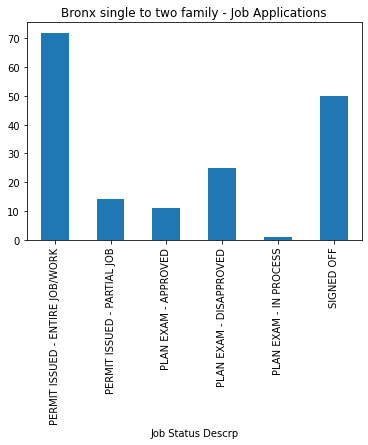

In [45]:
df4.groupby('Job Status Descrp')['Job #'].nunique().plot(kind='bar', title='Bronx single to two family - Job Applications')
plt.show()

In [46]:
df4['Job Status Descrp'].describe()

count                                 173
unique                                  6
top       PERMIT ISSUED - ENTIRE JOB/WORK
freq                                   72
Name: Job Status Descrp, dtype: object

The above plot shows that from this dataset, a total of 173 applications was submitted for the Bronx. Out of the total, the majority of work applications submitted are approved in its entirety. A total 0f 70 applications. While one shows the plan exam is still in process.

In [47]:
df6 = df4[ (df4['Job Status Descrp'] == 'PERMIT ISSUED - ENTIRE JOB/WORK') | (df4['Job Status Descrp'] == 'PERMIT ISSUED - PARTIAL JOB') ]
df6

,Job #,Borough,House #,Street Name,Job Status Descrp,Initial Cost,Total Est. Fee,Existing Dwelling Units,Proposed Dwelling Units,Pre- Filing Date,Latest Action Date,Other,Other Description,Applicants First Name,Applicants Last Name,Applicant Professional Title,Professional Cert,Paid,Fully Paid,Assigned,Approved,Fully Permitted,Owner Type,Owners First Name,Owners Last Name,Owners Business Name,Owners House Number,OwnersHouse Street Name,City,State,Zip,OwnersPhone #,Job Description
1570,220536971,BRONX,1647,YATES AVENUE,PERMIT ISSUED - ENTIRE JOB/WORK,$52000.00,$572.05,1.0,2.0,06/16/2016,07/03/2019 12:00:00 AM,X,GEN. CONSTR.,GIULIANO,PENNA,RA,N,06/16/2016,06/16/2016,10/15/2018,10/20/2016,06/07/2017,INDIVIDUAL,CARMINE,PETROSINO,NONE,1647,1647 YATES AVENUE,BRONX,NY,10461,9.17862e+09,"EXISTING ONE FAMILY HOUSE TO BE ALTERED,EXTEND..."
3841,220640956,BRONX,3815,HARPER AVE,PERMIT ISSUED - ENTIRE JOB/WORK,$290000.00,$911.00,1.0,2.0,02/25/2019,05/10/2019 12:00:00 AM,X,GEN. CONSTR.,JACOB,KANNER,RA,N,02/25/2019,02/25/2019,02/27/2019,04/04/2019,05/10/2019,CORPORATION,YOSSI,TOLEDANO,ZMIROT LLC.,124-20,124-20 METROPOLITAN AVE,KEW GARDENS,NY,11415,7.18441e+09,"EXISTING ONE FAMILY DWELLING TO BE RENOVATED ,..."
4729,210045609,BRONX,3264,HULL AVENUE,PERMIT ISSUED - ENTIRE JOB/WORK,$21000.00,$182.40,1.0,2.0,04/17/2008,05/15/2015 12:00:00 AM,X,GC,ALBERT,MONTOYA,RA,N,08/21/2008,09/04/2008,09/11/2008,03/20/2012,10/04/2012,INDIVIDUAL,YUK TING,LEE,NaN,3264,3264 HULL AVENUE,BRONX,NY,10467,9.17681e+09,CONVERSION OF ONE FAMILY TO TWO FAMILY DWELLIN...
4844,220689011,BRONX,2842,KINGSLAND AVENUE,PERMIT ISSUED - ENTIRE JOB/WORK,$497866.00,$1451.80,1.0,2.0,02/05/2019,11/06/2019 12:00:00 AM,X,GEN. CONSTR.,SHAHIN,BADALY,PE,N,02/05/2019,02/05/2019,02/27/2020,07/24/2019,11/06/2019,CORPORATION,RON,KARO,BLESS 18 LLC,35,35 RUGBY ROAD,ROSLYN HEIGHTS,NY,11577,7.18676e+09,CONVERT EXISTING 1-FAMILY DETACHED HOUSE TO A ...
5027,210179233,BRONX,1464,WARING AVENUE,PERMIT ISSUED - PARTIAL JOB,$248900.00,$734.40,1.0,2.0,03/19/2019,10/24/2019 12:00:00 AM,X,GEN. CONSTR.,MOHSEN,SALEH,PE,N,03/19/2019,03/19/2019,05/20/2019,10/01/2019,NaN,INDIVIDUAL,RAJA,RIZWAN,R & S CONSTRUCTION,967,967 EAST GUNHILL ROAD,BRONX,NY,10469,7.18406e+09,HORIZONTAL AND VERTICAL ENLARGEMENT AND CONVER...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169651,220644453,BRONX,4244,EAST TREMONT AVE,PERMIT ISSUED - ENTIRE JOB/WORK,$18000.00,$203.80,1.0,2.0,10/26/2018,03/27/2019 12:00:00 AM,X,GEN. CONSTR.,SALVATORE,PRAINITO,RA,Y,10/29/2018,10/29/2018,10/29/2018,03/08/2019,03/27/2019,CORPORATION,SALVATORE,CHIRICO,1908 HUNT AVE LLC,1140,1140 CASTLE HILL,BRONX,NY,10462,9.17577e+09,CHANGE OF USE FROM ONE FAMILY TO TWO FAMILY DW...
169660,220675197,BRONX,2489,MARION AVENUE,PERMIT ISSUED - ENTIRE JOB/WORK,$100000.00,$417.00,1.0,2.0,10/26/2018,09/06/2019 12:00:00 AM,X,GEN. CONSTR.,MALCOLM,BARKAN,PE,N,10/26/2018,10/26/2018,10/29/2018,04/03/2019,09/06/2019,CORPORATION,SHALIBHADRA,KOTHARI,2489 MAR LLC,20,20 WEST 47 STREET,NY,NY,10046,2.01443e+09,APPLICATION FILED FOR CONVERT 1 FAMILY TO 2 FA...
173777,201125424,BRONX,1026,EAST 228 STREET,PERMIT ISSUED - ENTIRE JOB/WORK,$100.00,$100.00,1.0,2.0,05/16/2007,05/05/2008 12:00:00 AM,X,NO WORK,BRIAN,ILL,RA,N,06/20/2007,06/20/2007,12/12/2007,04/25/2008,05/05/2008,INDIVIDUAL,EUGENT,ARNOLD,NaN,149 EDGE,149 EDGE PARK ROAD,WHITE PLAINS,NY,10603,9146840828,LEGALIZE EXISTING CODITIONS. OBTAN NEW C OF O ...
193802,220588950,BRONX,4742,CARPENTER AVENUE,PERMIT ISSUED - PARTIAL JOB,$125000.00,$482.00,1.0,2.0,03/23/2017,08/28/2019 12:00:00 AM,X,GEN. CONSTR.,GIOVANNI,ZAPATA,RA,N,03/23/2017,03/23/2017,02/04/2020,12/19/2017,NaN,INDIVIDUAL,JOSE,AGUAYZA,HOMEOWNER,4742,4742 CARPENTER AVENUE,BRONX,NY,10470,3477911086,CONVERT AN EXISTING LEGAL ONE (1) FAMILY BUILD...


**Total Permit issued:**

The total Permit Issued for Entire Job and for Partial Job totals 86


In [0]:
df['Pre- Filing Date'] = pd.to_datetime(df['Pre- Filing Date'])

In [49]:
df['Pre- Filing Date'].describe()

count                  253251
unique                   5560
top       2019-06-28 00:00:00
freq                     1717
first     1992-08-11 00:00:00
last      2020-03-04 00:00:00
Name: Pre- Filing Date, dtype: object

In [50]:
df_year = df['Pre- Filing Date'].map(lambda d: d.year).value_counts()
df_year

2019    78976
2018    49501
2017    24933
2016    15661
2015    10446
2014     7610
2010     6036
2008     5894
2007     5693
2006     5542
2005     5193
2009     4996
2004     4671
2013     4404
2003     4248
2002     4147
2011     4112
2000     4052
2001     3948
2012     3159
1998        6
1999        5
1996        5
1997        4
1995        3
1994        2
2020        2
1993        1
1992        1
Name: Pre- Filing Date, dtype: int64

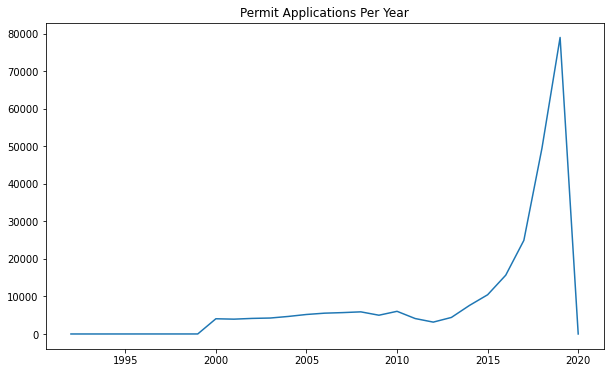

In [61]:
df_year.sort_index().plot(figsize = (10, 6), title='Permit Applications Per Year');

In [62]:
df['Pre- Filing Date'].min()

Timestamp('1992-08-11 00:00:00')

In [63]:
df['Pre- Filing Date'].max()

Timestamp('2020-03-04 00:00:00')